#### 搭建的神经网络，使用olivettiface数据集进行训练

In [7]:
from sklearn.datasets import fetch_olivetti_faces

In [8]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


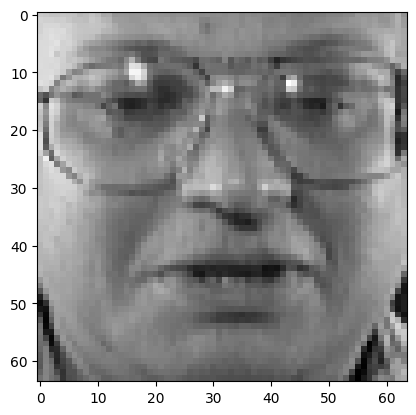

In [9]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [10]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], dtype=float32)

In [11]:
olivetti_faces.target

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [12]:
import torch
import torch.nn as nn

In [13]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [14]:
images.shape

torch.Size([400, 4096])

In [15]:
targets.shape

torch.Size([400])

In [16]:
dataset = [(img,lbl) for img,lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [17]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [18]:
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [19]:
# 多层神经网络模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.Linear(8192, 16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.ReLU(),
    nn.Linear(1024, 40)
).to(device)  # 模型结构搬到GPU内存中

In [20]:
print(model)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8192, out_features=16384, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=16384, out_features=1024, bias=True)
  (6): ReLU()
  (7): Linear(in_features=1024, out_features=40, bias=True)
)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
loss_hist = []
for i in range(10):
    for img,lbl in dataloader:
        img,lbl = img.to(device), lbl.to(device)  # 数据和模型在同一个设备端
        result = model(img)
        loss = criterion(result, lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist.append(loss.item())
        print(f'epoch:{i+1} loss:{loss.item():.4f}')

loss:3.6788
loss:26.5624
loss:12.4097
loss:3.6139
loss:4.0715
loss:3.6702
loss:3.6579
loss:4.2132
loss:3.7700
loss:3.6921
loss:3.7139
loss:3.6474
loss:3.7784
loss:3.7002
loss:3.7902
loss:3.7885
loss:3.6519
loss:3.7409
loss:3.7960
loss:3.7330
loss:3.6566
loss:3.7548
loss:3.7589
loss:3.6797
loss:3.7082
loss:3.7197
loss:3.6946
loss:3.6965
loss:3.7054
loss:3.6758
loss:3.6961
loss:3.7087
loss:3.6900
loss:3.7233
loss:3.7164
loss:3.7010
loss:3.7087
loss:3.7100
loss:3.6996
loss:3.6988
loss:3.6979
loss:3.6673
loss:3.6677
loss:3.9433
loss:3.6424
loss:3.6484
loss:3.6877
loss:3.6811
loss:3.6692
loss:3.7045
loss:3.6907
loss:3.6927
loss:3.7049
loss:3.6963
loss:3.7055
loss:3.6867
loss:3.6931
loss:3.6863
loss:3.6990
loss:3.6787
loss:3.6776
loss:3.6852
loss:3.6879
loss:3.7052
loss:3.6934
loss:3.6954
loss:3.6998
loss:3.6998
loss:3.6787
loss:3.7014
loss:3.7064
loss:3.6883
loss:3.6830
loss:3.6826
loss:3.6839
loss:3.6972
loss:3.6936
loss:3.6876
loss:3.6763
loss:3.6847
loss:3.6811
loss:3.6911
loss:3.6856
lo

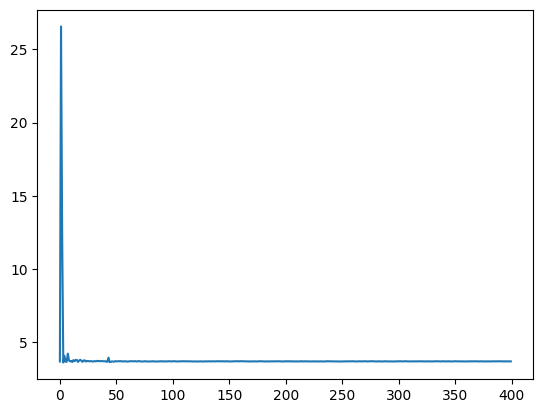

In [23]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.show()